# 머신러닝
       
       
3주 2강: Numpy Intermediate
<br/><br/>

숭실대학교<br/>
AI융합학부<br/>
윤진혁<br/>

# 이번 시간에 배울 것들
* Aggreations
* Broadcasting
* Boolean Arrays
* Masks

# Aggregations: Min, Max, and Everything In Between

큰 데이터를 다룰 떄 가장 먼저 하는 일 중 하나는 기본 통계를 보는 것입니다.
예를 들어서 전체의 최대값, 최소값, 최빈값, 평균, 중간값 등을 보는 것이지요.

Numpy의 빠른 Aggregation 함수들을 통해서 이러한 값들을 구해봅시다. 

## Summing the Values in an Array

Array의 모든 값들을 더하고 싶다면 어떻게 하면 될까요?
물론 Python의 기본 ``sum`` 함수가 있긴 합니다.

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

np.float64(49.46981539504982)

유사하게 numpy에도 ``numpy.sum`` 함수가 있습니다. 인터페이스도 유사합니다.

In [3]:
np.sum(L)

np.float64(49.469815395049835)

같은 결과를 내 주기는 하지만, python의 sum보다는 numpy의 sum이 compiled code를 사용하기 때문에 훨씬 빠릅니다.

In [4]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

64.5 ms ± 261 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
282 μs ± 2.65 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


주의하셔야 할 점은 ``sum`` function과 ``np.sum`` function의 작동이 항상 같은 식으로 이루어지지는 않는다는 것입니다.

예를 들어서 지금같은 1d array에서는 똑같이 작동하지만, 다차원 배열에서 np.sum과 sum은 다르게 작동합니다. 이는 뒤에서 다시 다루겠습니다.

## Minimum and Maximum

``min`` and ``max``도 Python의 기본 함수가 있습니다.

In [5]:
min(big_array), max(big_array)

(np.float64(2.5679002941814133e-06), np.float64(0.9999995887897353))

또 그에 대응하는 NumPy의 함수도 있습니다.

In [6]:
np.min(big_array), np.max(big_array)

(np.float64(2.5679002941814133e-06), np.float64(0.9999995887897353))

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

42.2 ms ± 205 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
218 μs ± 3.36 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


위의 sum, min, max는 array의 object function으로 사용이 가능합니다.

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

2.5679002941814133e-06 0.9999995887897353 500031.43167178426


위의 속도 차이를 보시면 알겠지만, 가능하면 무조건 aggregation을 쓰는 것이 이익입니다. 

### Multi dimensional aggregates

사실 다차원 배열을 사용하면서 가장 흔한 aggreation 중 하나는 각 row나 column을 aggregate하는 것입니다. 
예를 들어서 아래와 같은 2차원 행렬이 있다고 생각해 봅시다.

In [9]:
M = np.random.random((3, 4))
print(M)

[[0.18063315 0.04868414 0.11212696 0.44933067]
 [0.21027178 0.27466577 0.77029378 0.43724047]
 [0.08796578 0.04115027 0.75691213 0.08648945]]


기본적으로는 numpy의 aggregation function들은 전체의 array값에 대해서 작동합니다.

In [10]:
M.sum()

np.float64(3.455764355046685)

하지만 *axis*를 명시해 주면 column이나 row에 대한 계산이 가능합니다. 각 column에 대한 값을 보고싶다면 ``axis=0``이라는 파라미터를 넣어주면 됩니다.

In [11]:
M.min(axis=0)

array([0.08796578, 0.04115027, 0.11212696, 0.08648945])

반대로 row에 대해서는 ``axis=1``파라미터를 써주면 됩니다.

In [12]:
M.max(axis=1)

array([0.44933067, 0.77029378, 0.75691213])

``axis`` 파라미터는 "어떤 차원"을 축소할 것인지를 명시해 줍니다. 예를 들어서 0은 첫번째 axis를 축소해 주는 것을 말합니다. 즉, 2차원 행렬에서는 row를 축소하는 것을 의미합니다. 

### Other aggregation functions

Numpy에는 위에 소개한 것 말고도 많은 aggregation function이 있습니다. 
다 소개하기에는 수업시간이 많이 모자르므로, 아래 간단히 무엇이 있는지 소개해 드리겠습니다.
더불어서 보통의 aggregation function은 ``NaN``이 데이터에 있으면 에러가 납니다. 하지만 몇몇 경우를 제외하고 ``Nan``-safe 인 대응 함수가 존재합니다.


|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

## Example: 미국 대통령의 평균 키는?

이러한 aggreagation으로 요약통계를 내는 것은 매우 효율적입니다. 

``data/president_heights.csv`` 파일은 조 바이든까지의 미국 대통령 키를 기록하고 있습니다.

In [13]:
!more +40 "data/president_heights.csv"

41,George H. W. Bush,188
42,Bill Clinton,188
43,George W. Bush,182
44,Barack Obama,185


Pandas를 지금 배우지는 않지만, data를 읽는 데에 사용해 봅시다. 

In [14]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


아래와 같이 numpy array의 요약 통계를 낼 수 있습니다.

In [15]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


또한 quantile, percentile등도 쉽게 구할 수 있습니다.

In [16]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.percentile(heights, 50))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
Median:             182.0
75th percentile:    183.0


미국 대통령 키의 중간값은 is 182 cm 입니다. 참고로 현 대통령인 조 바이든 대통령이 딱 182 cm 입니다...

이것도 이번 시간에 배우지는 않지만, 간단한 시각화를 해 볼까요? 자세한 것은 다음 주에 배우게 될 것입니다. 

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()  # set plot style

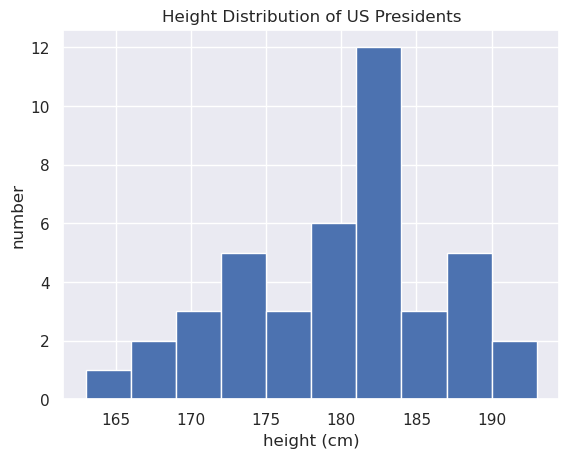

In [20]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

# Computation on Arrays: Broadcasting

지난 시간에 UFuncs를 사용하는 이유는 python의 loop에 비해서 벡터화된 ufuncs가 훨씬 빠르기 떄문임을 배웠습니다.

서로 다른 사이즈의 배열에 대한 binary ufuncs (예를 들어서 addition, subtraction, multiplication, etc.)을 다루는 방법을 broadcasting 이라고 합니다. 사실 데이터의 형태가 다양하므로, 이 broadcasting 또한 매우 유용합니다.

## Introducing Broadcasting

같은 크기의 array에 대한 binary operation은 성분별로 이루어진다는 것을 지난 시간에 배웠습니다.

In [21]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting은 서로 다른 사이즈의 Array가 binary operation의 인자로 들어왔을 때, 작은 쪽 array가 어떤 식으로 변형되어 작동되는 방식을 의미합니다. 

먼저 scalar도 0-dim array로 볼 수 있습니다. 

In [22]:
a + 5

array([5, 6, 7])

이 작동은 scalar인 ``5`` 를 array ``[5, 5, 5]``로 변환하고, 이를 원 행렬에 더하는 것으로 볼 수 있습니다. 

Numpy broadcasting의 장점은 실제로는 array가 변환되는 것이 아니기 때문에, 더 효율적으로 작동한다는데 있습니다. 

고차원 행렬에도 동일한 방식의 operation이 가능합니다.

In [23]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [24]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

1d array인 ``a``가 두번째 축으로 broadcast 되어서 M과 같은 형태가 되어 더해졌습니다. 

위 경우는 아주 쉽게 이해할 수 있는 경우입니다만, 조금 더 복잡한 경우를 생각해봅시다.
두 개 모두 array인데, array의 shape가 다릅니다. 

In [25]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [26]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

이 경우에는 ``a``와 ``b``모두가 확장이 되고, 같은 형태로 변형됩니다. 그래서 $3 \times 3$의 2d array가 됩니다.

![Broadcasting Visual](Figs/02.05-broadcasting.png)

Note: This figure is adapted from source published in the [astroML](http://astroml.org) documentation. Used by permission.

흐리게 그려진 박스가 broadcasted values입니다. 추가적인 메모리 할당이 없기 때문에, 실제로 저렇게 복사가 되는 것은 아닙니다.

추가적인 메모리 할당이 없으므로, 큰 데이터를 다룰 때 메모리를 효율적으로 사용 가능합니다. 

## Rules of Broadcasting

Numpy의 Broadcasting은 두 array의 형태에 따라 아래의 3가지 규칙에 의해 결정됩니다. 

- Rule 1: 두 Array의 차원이 다르다면, 적은 쪽 array가 차원이 확장되는 left-side *padding*을 합니다.
- Rule 2: 두 Array의 모든 차원에서 shape가 다르다면, 차원 중 shape가 1인 array를 확장해서 다른 array와 shape를 맞춥니다
- Rule 3: 두 array의 어떤 차원에서든 shape가 다르고, 둘 중 한 차원도 size가 1이 아니라면 에러가 발생합니다.

### Broadcasting example 1

2d array와 1d array를 생각해 봅시다.

In [27]:
M = np.ones((2, 3))
a = np.arange(3)

두 Array의 shape에 대해 생각해 봅시다.

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

Rule 1에 의하여 ``a`` 가 더 낮은 차원이므로, a의 shape가이 아래처럼 변합니다. 

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

Rule 2에 의해서, first dimension의 크기가 일치하지 않으므로 첫 차원의 크기가 변화합니다.

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

최종적인 결과 array는 shape가 ``(2, 3)``이 됩니다:

In [28]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

이번에는 2개의 Array가 모두 Broadcast 해야 하는 경우를 생각해 봅시다.

In [29]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

각각 아래의 shape를 가집니다.

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1: b의 shape가 변합니다.:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

Rule2: a와 b 모두 shape가 변합니다.

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

즉, 3 by 3 array가 최종적으로 생성됩니다.

In [30]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

두 Array가 결과적으로 Broadcast를 할 수 없는 경우를 생각해 봅시다.

In [31]:
M = np.ones((3, 2))
a = np.arange(3)

1번 예시와 비슷하지만 ``M`` 이 transpose 되어 있습니다. 

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Rule 1에 의해서 ``a``가 변화합니다.

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

Rule 2에 의해서 ``a``의 첫번째 차원이 ``M``과 매칭되도록 커집니다.:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Rule 3에 의해서 더이상 변화할 수 없으므로, 에러가 발생합니다.

In [32]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

그런데 만약 a가 right-side padding을 한다고 가정하면 두 개를 더할 수 있겠지요.

근데 이게 자동으로 작동한다면, 두 가지가 모두 가능한 경우에 혼란을 가져올 수 있습니다. 그래서 기본적으로 broadcasting에서 right-side padding은 지원하지 않습니다.

꼭 필요한 경우에는 지난 시간에 배운 ``np.newaxis``를 이용하면 됩니다.

In [33]:
a[:, np.newaxis].shape

(3, 1)

In [34]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

위의 예제에서는 ``+`` operator를 사용했지만 그 이외의 어떤 ``ufunc``도 위와 같이 작동한다는 사실을 기억해주세요.

예를 들어서 ``logaddexp(a, b)`` function을 볼까요? ``log(exp(a) + exp(b))``를 계산하는 ufunc입니다.

In [35]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice

이게 도대체 어떤 떄에 유용할까요? 사실 위의 예들로는 감이 잘 오지 않습니다.

실제 예를 토대로 이러한 Broadcasting이 유용하게 쓰이는 경우를 봅시다.

### Centering an array

Array 데이터의 평균을 0으로 만드는 Centering 작업을 생각해 봅시다. 
$10 \times 3$ array를 하나 만들어 봅시다.

In [36]:
X = np.random.random((10, 3))

각각의 element 평균을 구해봅시다. 1번째 차원으로 ``mean`` aggregate를 해 봅시다.:

In [37]:
Xmean = X.mean(0)
Xmean

array([0.58041678, 0.3726559 , 0.57821492])

``X`` 를 각 차원의 평균으로 뺀 것으로 X의 평균을 0으로 만들어 봅시다.

In [38]:
X_centered = X - Xmean

실제로 평균이 0인지 확인해 봅시다.

In [39]:
X_centered.mean(0)

array([ 1.11022302e-17, -5.55111512e-18, -1.11022302e-17])

Numerical Precision보다 작은 값이므로, 평균이 0임을 알 수 있습니다.

In [40]:
print(np.finfo(np.float64).eps)

2.220446049250313e-16


### Plotting a two-dimensional function

2d function으로 그림을 그리는 경우에도 유용합니다.

$z = f(x, y)$형태의 function을 만들고 싶다고 가정해 봅시다. 

In [41]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [42]:
print(x.shape, y.shape)

(50,) (50, 1)


다음 주에 matplotlib을 배우겠지만, 일단 2d 그림을 그려봅시다.

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

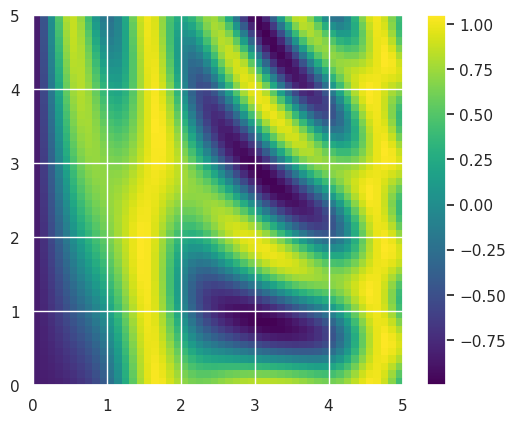

In [44]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()
plt.show()

# Comparisons, Masks, and Boolean Logic

Numpy array의 강력한 점 중 하나는 Boolean 을 통한 masking이 가능하다는 것입니다. 

이를 통해서 조건에 맞는 값만 골라내는 등의 일을 할 수 있습니다. 예를 들어서 특정 값보다 큰 값만 골라내거나, 일정 값을 넘는 outlier를 모두 지우거나 하는 일이 가능합니다.

당연하게도 For loop등에 비해서 훨씬 빠르고 효율적입니다.

## Example: Counting Rainy Days

시애틀의 일 평균 강수량 데이터가 ``data/Seattle2014.csv``에 있습니다.
이 데이터를 통해서 Boolean Logic을 테스트해 봅시다.
Pandas는 몇 주 후에 배우겠지만, Pandas로 일단 데이터를 불러와봅시다.

In [45]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
print(type(inches), inches.shape)

<class 'numpy.ndarray'> (365,)


이 Array에는 365개의 값이 있습니다. 각각 2014/01/01 부터 2014/12/31 까지 시애틀의 일별 강수량을 나타냅니다.

다음주에 배울 예정이지만, 조금 빠르게 Matplotlib을 사용해서 이 그림을 그려봅시다.

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()  # set plot styles

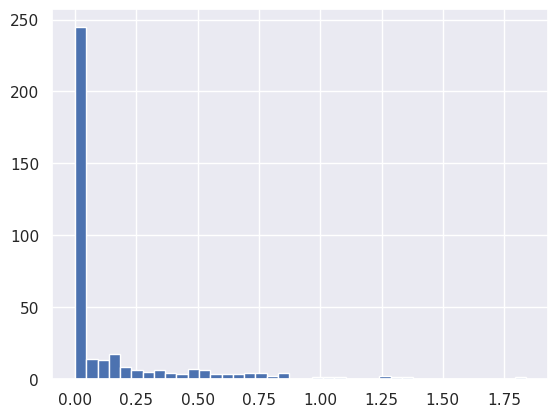

In [47]:
plt.hist(inches, 40)
plt.show()

시애틀은 일년 내내 비가 많이 오는 것으로 유명합니다. 

하지만 실제로는 대부분의 경우에 0 근처에 강수량이 몰려있습니다. 즉 시애틀은 생각보다 비가 오지 않습니다.

그런데 이것 만으로 우리가 시애틀의 기후를 모두 알 수 있을까요? 예를 들어서 시애틀은 일년에 몇일이나 비가 올까요? 비가 오는 날의 강수량 평균은 어떨까요? 더 나아가서 0.5인치 이상 비가 온 날은 며칠이나 될까요? 

당연히 Loop를 통해서 이러한 것들을 찾을 수 있습니다. 하지만 다시 한 번 말씀드리지만 Loop는 매우 느립니다. 

이 때 유용한 것이 Boolean operation입니다.

데이터는 잠시 놓아두고, Boolean operation이 어떻게 작동하는지 일단 공부를 해 봅시다.

## Comparison Operators as ufuncs

지난 시간에 ufuncs에 대해서 배웠습니다. 대부분 더하기 빼기 곱하기 나누기 등의 사칙연산 operator를 주로 사용했지요

그런데 사실 이 ufunc에는 비교 연산자도 있습니다 예를 들어서 ``<`` (작다) 혹은 ``>`` (크다) 같은 것이지요. 

더 중요한 것은 이 operator는 elementwise로 작동합니다. 즉, 각 성분이 특정 값이나 특정 array와 비교해서 크거나 같은지를 확인해 볼 수 있는 것이지요.

예를 들어서 아래와 같은 것들이죠.

In [48]:
x = np.array([1, 2, 3, 4, 5])

In [49]:
x < 3  # less than

array([ True,  True, False, False, False])

In [50]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [51]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [52]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [53]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [54]:
x == 3  # equal

array([False, False,  True, False, False])

더 중요한 것은, 단순한 연산 뿐 아니라 이러한 비교 연산의 조합이 가능하다는 것입니다. 2를 곱한 값과 제곱이 같은 경우를 찾고 싶다면 아래 형태의 논리식을 쓰면 됩니다.

In [55]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

사칙연산과 동일하게 이러한 ``x < 3`` operator는 내부적으로 NumPy에서는 ``np.less(x, 3)`` 함수를 호출합니다.

| Operator	    | Equivalent ufunc    | Operator	   | Equivalent ufunc    |
|---------------|---------------------|---------------|---------------------|
| ``==``        |``np.equal``         |``!=``         |``np.not_equal``     |
| ``<``         |``np.less``          |``<=``         |``np.less_equal``    |
| ``>``         |``np.greater``       |``>=``         |``np.greater_equal`` |

또한 이것도 ufunc이기 때문에 어떤 형태의 array에도 사용이 가능합니다.

In [56]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [57]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

모든 경우에 반환되는 결과는 ``boolean array`` 입니다. 참과 거짓 값만을 가진 array인 것이지요.

## Working with Boolean Arrays

Boolean array를 사용하면, 꽤나 다양하고 재미있는 기능을 사용할 수 있습니다. 
``x`` array를 활용해서 boolean array를 사용하는 법을 배워봅시다.

In [58]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

가장 쉬운 것은 참값만을 세는 것입니다. 이 경우 ``np.count_nonzero``를 보면 됩니다. ``False``는 0처럼 취급됩니다.

In [59]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

8개의 element가 6보다 작은 것을 알 수 있습니다.

혹은 True는 1처럼 취급되므로, ``np.sum``을 사용할 수도 있습니다. 

In [60]:
np.sum(x < 6)

np.int64(8)

``sum``은 axis별로 작동하게 할 수 있으므로, 각 column 혹은 row에 대해서 True의 숫자를 세는 데에도 유용합니다.

In [61]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

모든 row에 대해서 6보다 작은 element의 수가 계산되었습니다.

이러한 boolean operation과 ``np.any`` 와 ``np.all`` 을 결합해서 간단한 특성들에 대해서 체크해볼 수도 있습니다. 

In [62]:
# are there any values greater than 8?
np.any(x > 8)

np.True_

In [63]:
# are there any values less than zero?
np.any(x < 0)

np.False_

In [64]:
# are all values less than 10?
np.all(x < 10)

np.True_

In [65]:
# are all values equal to 6?
np.all(x == 6)

np.False_

``np.all`` 와 ``np.any`` 또한 특정 축에 대해서 계산할 수 있습니다.

In [66]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

2번 row 경우를 제외하고 모두 8보다 작은 값만 있는 것을 알 수 있습니다.

python의 내장 ``sum()``, ``any()``, ``all()`` 함수와 ``np.sum()``, ``np.any()``, ``np.all()``의 작동은 같지 않습니다. 유의하셔야 합니다.

### Boolean operators

자 그럼 다시 위의 강수량 데이터로 돌아와 봅시다.
강수량이 0.5인치보다 크고, 1인치보다 작은 날은 얼마나 될까요? 

이러한 Boolean 값의 연산은 Python의 *bitwise logic operators*, ``&``, ``|``, ``^``, ``~``을 통해서 가능합니다..

Numpy는 이러한 비트논리연산자를 element-wise하게 overloading 하여 작동합니다. 

In [67]:
np.sum((inches > 0.5) & (inches < 1))

np.int64(29)

즉, 0.5인치에서 1.0인치 사이로 비가 온 날은 총 29일임을 알 수 있습니다. 

만약에 

```python
np.sum(inches > 0.5 & inches < 1)
```

형태로 식이 주어진다면 어떻게 될까요? 이 경우는 우선순위 규칙에 따라서 아래처럼 작동하게 됩니다. 

``` python
inches > (0.5 & inches) < 1
```

즉, 제대로 작동하지 않습니다.

논리연산, 혹은 집합등에서 가장 먼저 배우는 것 중 하나가 *A and B* 와 *NOT(NOT A or NOT B)*가 같다는 것입니다. ``~``은 not을 나타냅니다. 

In [68]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

np.int64(29)

Boolean Operator들은 아래와 같은 4가지가 있습니다. 

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

이러한 Boolean Operator를 통해서, 우리가 원하는 문제에 대한 답을 얻을 수 있습니다.

In [69]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Boolean Arrays as Masks

더 중요한 것은 이러한 Boolean Array를 일종의 "Mask"로 쓸 수 있다는 것입니다.

Mask로 쓰면, 특정 조건에 맞는 값만 추출하는 indexing 등을 쉽게 수행할 수 있습니다. 

이전에 만들었던 x array로 돌아가 봅시다.

In [70]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

5보다 작은 성분을 나타내는 Boolean Array는 아래와 같죠.

In [71]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

*masking* operation을 통해서 이러한 값들만 골라낼 수 있습니다. 간단히 ``[]``에 위의 array 혹은 논리식을 넣어 주면 됩니다.

In [72]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

``True`` 로 마스킹 된 값들만 출력되었습니다.

즉, 이제 우리가 원하는 종류의 값만 골라내어 다양한 연산을 수행할 수 있습니다.

시애틀 강수량 데이터를 다시 돌아봅시다.
비가 온 날이나 여름만 분석을 하고 싶습니다. 

In [73]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [74]:
x[x>5] = -1
display(x)

array([[ 5,  0,  3,  3],
       [-1, -1,  3,  5],
       [ 2,  4, -1, -1]])

## Aside: Using the Keywords and/or Versus the Operators &/|

Python에는 ``and`` 와 ``or`` 키워드가 있습니다. 또한 ``&`` 와 ``|`` 오퍼레이터도 있습니다.

두 가지의 차이는 무엇일까요?

``and`` 와 ``or`` 는 전체 object에 대한 연산을 수행하고, ``&`` 와 ``|``는 object의 안에 있는 bit에 대해 연산을 수행합니다.

``and``와 ``or``를 사용할 때는 Python이 object를 한개의 Boolean 값으로 봅니다. 

Python에서는 0이 아닌 모든 값은 Boolean으로 변환하면 True 입니다.

In [75]:
bool(47), bool(0)

(True, False)

In [76]:
bool(42 and 0)

False

In [77]:
bool(42 or 0)

True

``&`` and ``|``을 정수에 대해 사용할때는, 이 정수의 binary bit에 대해서 논리연산을 수행하게 됩니다. 즉, ``and``와 ``or``을 모든 bit에 대해 수행하는 것이지요.


In [78]:
bin(42)

'0b101010'

In [79]:
bin(59)

'0b111011'

In [80]:
bin(42 & 59) # 둘 다 1인 경우만 1이 됩니다.

'0b101010'

In [81]:
bin(42 | 59) # 둘 중 하나만 1이라도 1이 됩니다.

'0b111011'

In [82]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

np.array에 대해서 ``or``은 정의되지 않습니다.

In [83]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

array에 사용할 떄는 그래서 ``|`` 나 ``&``을 써야 하고, ``or`` 나 ``and``를 쓰면 안됩니다

In [84]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

and를 쓰면 ``ValueError`` 가 발생합니다.

In [85]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

다시 한 번 말하면, ``and`` 와 ``or``는 오브젝트 전체에 대해서 한 번 boolean evaluation을, ``&`` 와 ``|`` 오퍼레이터는 그 안의 내용들에 대해서 pairwise로 비교하는 evalution을 하게 됩니다. Numpy Array의 경우 거의 무조건 후자가 맞는 답입니다.

## 이번 시간을 마치며
이번 시간에는 numpy의 중급(?) 기능을 배워 보았습니다.

실제로 데이터를 다루다보면 복잡한 상황을 자주 마주하게 됩니다. 

그런 것을 몇 번 겪다 보면, 조금 더 익숙하게 데이터를 다루실 수 있게 되실 것이라 생각합니다.

그럼 다음 시간에 뵙겠습니다!